# **Graphical Representation and Visualization**


## **Overview of our research process**

We initiated the project by downloading the ERA5 dataset, selecting relevant parameters, and submitting a download request. After approval, the data was received in GRIB format, which requires specialized processing tools. To streamline the workflow, we uploaded the data to a cloud drive for seamless access in Google Colab and implemented necessary libraries for efficient extraction and analysis.

### **Calculation of Earth Division and Area**
**Grid Structure and Latitude-Based Division**
To facilitate energy absorption calculations, we divided the Earth’s surface into grid squares based on 5-degree latitude intervals. Due to the spherical shape of the Earth:


*   Latitude bars shorten near the poles.

*   The width of each grid square varies with latitude as the distance between longitudes changes.

To simplify the calculations, we calculated the area for a single representative square at each latitude level, ensuring a practical and scalable approach.

**Energy Absorption Calculation**
After defining the grid and assigning data points, we calculated energy absorption using two different methods:


*   Absorption using heat capacity and air capacitance
*   Absorption using solar radiation

Custom-developed equations allowed for comparative analysis to assess the consistency of energy absorption estimates across different locations and times.



After this process, we obtain an output of the energy calculation and proceed to the next stage of visualization.

### **Graphical Representation and Visualization Process**

The processed data is presented using a graphical representation that shows energy absorption patterns on the Earth's surface. The visualization

**steps include:**



*   **Time Segmentation:** The data is divided into six different time periods within a 24-hour cycle.
*   **Global Mapping:** A color-coded map of the Earth is created, where:

   * Blue represents low energy absorption
   * Red represents high energy absorption

*   **Axis Representation and Data Representation:**
   * X-axis: Represents longitude, showing the variation between different locations.

   * Y-axis: Represents latitude, showing the distribution from the equator to the poles.
   * The graph is structured as a heat map, allowing easy identification of energy absorption trends in different regions.
   

### **Purpose of Visualization**
The main purpose of the graphical representation is to observe and analyze how energy absorption varies at different locations and times. By providing a clear visual description of the data, this method helps in understanding the dynamics of energy transfer affected by geographical and atmospheric conditions.

### **Note: The code processes data for one full day.























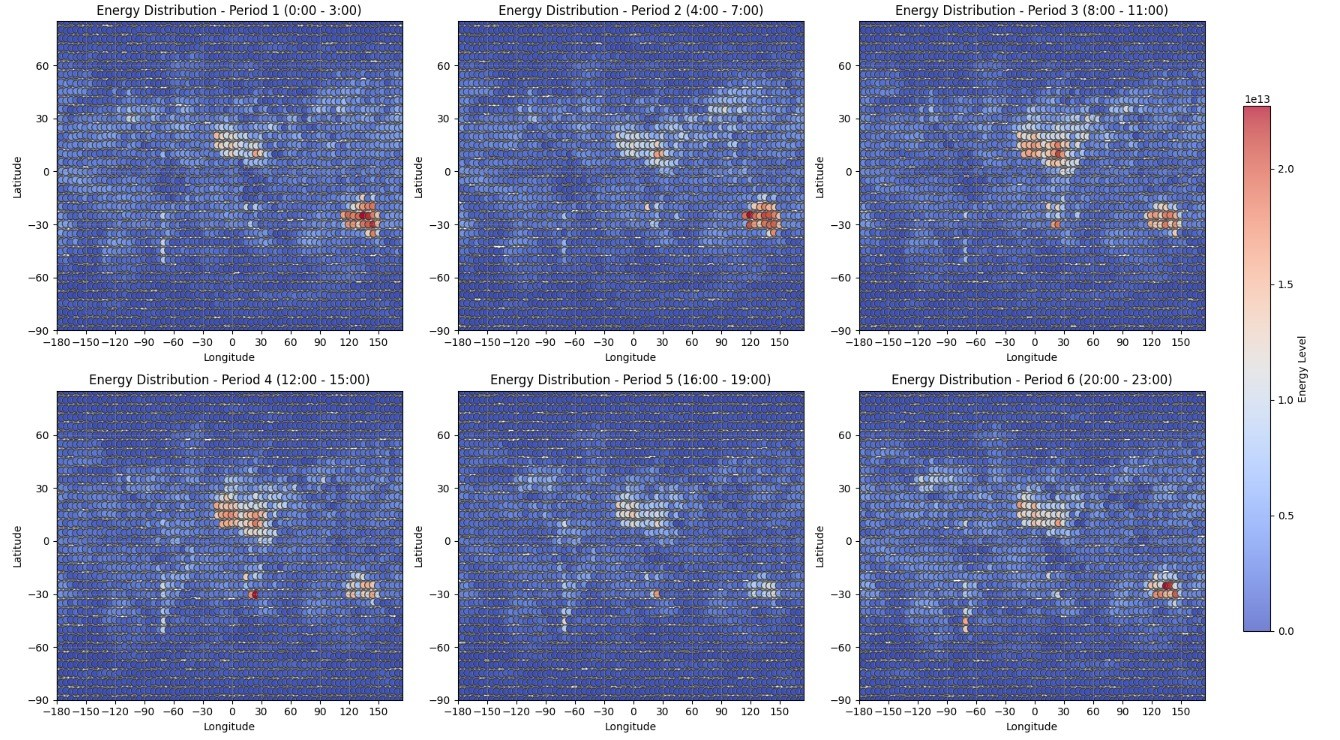



### **Example of code output:**
represent global energy absorption results based on an estimated atmospheric heat capacity for a single day, divided into six time periods. Each point on the Earth reflects the amount of energy absorbed according to changes in temperature, humidity, and surface characteristics.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')


# Load data from CSV file
file_path = "/content/drive/My Drive/data_project/Corrected_Energy_Example.csv"
df = pd.read_csv(file_path)

# Create 'Area' column by combining Latitude and Longitude
df["Area"] = df["Latitude"].astype(str) + ":" + df["Longitude"].astype(str)

# Get unique areas from the dataset
unique_areas = df["Area"].unique()

# Constant: Number of areas per plot
areas_per_plot = 10  # Adjust as needed

# Calculate the number of required plots
num_plots = int(np.ceil(len(unique_areas) / areas_per_plot))

# Create subplots for visualization
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 5 * num_plots), sharex=True)

# Ensure axes is iterable if there's only one plot
if num_plots == 1:
    axes = [axes]

# Generate plots for each group of areas
for i, ax in enumerate(axes):
    start_idx = i * areas_per_plot
    end_idx = start_idx + areas_per_plot
    areas_subset = unique_areas[start_idx:end_idx]

    for area in areas_subset:
        group = df[df["Area"] == area]
        ax.plot(group["Local_Time"], group["Energy_Value"], marker="o", linestyle="-", label=area)

# Configure plot labels and titles
    ax.set_xlabel("Day")
    ax.set_ylabel("Energy Value")
    ax.set_title(f"Energy Trends for Areas {start_idx+1} to {min(end_idx, len(unique_areas))}")
    ax.legend(title="Areas", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=1)
    ax.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
